# A3

## Given:
a = 14 $R_{Earth}$, e = 0.925

## Find:
a) Eccentric Anomaly ($E$) for 20 values of mean anomalies ($M$), $E_0$ = M for first guess. Reuiqred accuracy is $|\Delta E| < 10^{-12}| radians$

b) Time history of $\theta^*$, $E$, $M$ for the orbit. 

i) What point are the angles equal? 

ii) Max and Min slope of each? What does it mean?

c) Plot r as a function of all of these. Are the curves the same? Why?

In [1]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

In [2]:
# Given
a = 14*SS.loc['Earth','r']
e = 0.925

In [3]:
step = np.pi/10
M = np.arange(0,np.pi*2+step, step=step )
E = [kp.E_M(m, e, acc = 10**-12, n_count = True) for m in M]


In [4]:
df_M = pd.DataFrame(np.rad2deg(M),columns=['M (deg)'])
df_E = pd.concat([df_M, pd.DataFrame(E,columns=['E (deg)','Iterations'])], axis=1)
df_E['E (deg)'] = np.rad2deg(df_E['E (deg)'])
round(df_E,2)

,M (deg),E (deg),Iterations
0,0.0,0.00,1
1,18.0,66.66,8
2,36.0,88.99,7
3,54.0,105.16,7
4,72.0,118.55,6
5,90.0,130.38,6
6,108.0,141.21,5
7,126.0,151.38,5
8,144.0,161.14,5
9,162.0,170.63,4


### b) Time histories

In [5]:
Per_s = 2*np.pi/np.sqrt(SS.loc['Earth','miu'] / a**3)
time = np.linspace(0,Per_s,200)
M_t = np.sqrt(SS.loc['Earth','miu'] / a**3)*time
E_t = np.array([kp.E_M(m, e, acc = 10**-12) for m in M_t])
theta_st_t =  2*np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E_t/2) )


Text(0.5, 0, 'Time [s]')

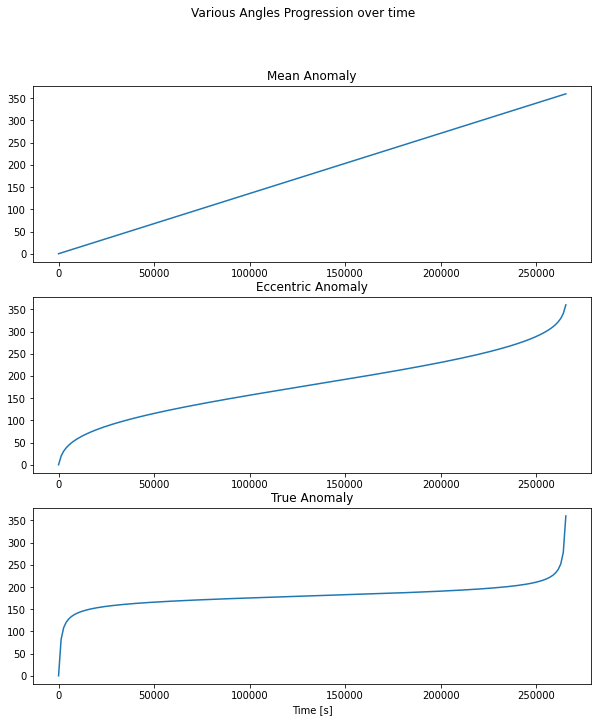

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,11))

ax[0].plot(time, np.rad2deg(M_t))
ax[0].set_title('Mean Anomaly')

ax[1].plot(time, np.rad2deg(E_t))
ax[1].set_title('Eccentric Anomaly')

ax[2].plot(time, np.rad2deg(kp.wrapto2pi(theta_st_t)))
ax[2].set_title('True Anomaly')

plt.suptitle('Various Angles Progression over time')
plt.xlabel('Time [s]')